# Exploring eBay Car Sales Data

### Introduction

We will be using a dataset of used cars from _eBay Kleinanzeigen_, a classified section from German eBay website.

The dataset was originally scraped and uploaded to _Kaggle_. This dataset is however been modified slightly:
- Only 50,000 data points have been sampled fromt he full datset to ensure faster processing times.
- The datasets uploaded on Kaggle are often pre-cleaned, so this dataset has been artificially _dirtied_ to resemble the original dataset that was scraped.

### Aim

The aim of this project is to clean the data and analyze the included car listings.

__Libraries used:__ Pandas, NumPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [3]:
#Display the DataFrame
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [5]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Observations
- The dataset has a total of 20 columns with 50,000 entries.
- The date-time is in format: YYYY-MM-DD HH:MM:SS.
- Spaces have been repalced with underscores in the names.
- Price is in dollars, however with a dollar sign and non-numeric.
- Odometer is in units of kilometers.
- Some columns have null values, but only a small fraction.
- Header is in _camelcase_ instead of the standard _snakecase_.

### Changing column names from `camelcase` to `snakecase`

In [6]:
cols = np.array(autos.columns)
print(cols)

['dateCrawled' 'name' 'seller' 'offerType' 'price' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'odometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']


In [7]:
#Changing the header to snakecase
cols[np.where(cols == "yearOfRegistration")] = "registration_year"
cols[np.where(cols == "monthOfRegistration")] = "registration_month"
cols[np.where(cols == "notRepairedDamage")] = "unrepaired_damage"
cols[np.where(cols == "dateCreated")] = "ad_created"
cols[np.where(cols == "dateCrawled")] = "date_crawled"
cols[np.where(cols == "offerType")] = "offer_type"
cols[np.where(cols == "vehicleType")] = "vehicle_type"
cols[np.where(cols == "powerPS")] = "power_PS"
cols[np.where(cols == "fuelType")] = "fuel_type"
cols[np.where(cols == "nrOfPictures")] = "no_of_pictures"
cols[np.where(cols == "postalCode")] = "postal_code"
cols[np.where(cols == "lastSeen")] = "last_seen"

In [8]:
print(cols)

['date_crawled' 'name' 'seller' 'offer_type' 'price' 'abtest'
 'vehicle_type' 'registration_year' 'gearbox' 'power_PS' 'model'
 'odometer' 'registration_month' 'fuel_type' 'brand' 'unrepaired_damage'
 'ad_created' 'no_of_pictures' 'postal_code' 'last_seen']


In [9]:
autos.columns = cols

In [10]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In this process above we have changed the header of the DataFrame to be in snakecase.

### Overview of values in each column

In [11]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-23 18:39:34,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [12]:
autos["registration_month"].unique()

array([ 3,  6,  7,  4,  8, 12, 10,  0,  9, 11,  5,  2,  1], dtype=int64)

In [13]:
autos["no_of_pictures"].unique()

array([0], dtype=int64)

- Columns __`price`__ and __`odometer`__ should be numeric but aren't.
- Column __`registration_month`__ has 13 unique (0-12).
- Column __`no_of_pictures`__ only has one value (0) and is useless to us.

### Coverting the columns, `price` and `odometer` to numeric

In [14]:
autos["odometer"] = (autos["odometer"]
                                .str.replace("km", "")
                                .str.replace(",", "")
                                .astype(float))

In [15]:
autos.rename({"odometer":"odometer_km"}, axis=1, inplace=True)

In [16]:
autos["price"] = (autos["price"]
                                .str.replace("$", "")
                                .str.replace(",", "")
                                .astype(float))

In [17]:
print(autos["price"].dtype)
print(autos["odometer_km"].dtype)

float64
float64


In the process above we converted the __`price`__ and __`odometer`__ (now __`odometer_km`__ column) to numeric.

### Analyzing the `odometer_km` and `price` column for any outliers and removing them

In [18]:
#Analyzing odometer_km column
autos["odometer_km"].unique().shape

(13,)

In [19]:
autos["odometer_km"].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [20]:
autos["odometer_km"].value_counts().sort_index(ascending=False)

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
40000.0       819
30000.0       789
20000.0       784
10000.0       264
5000.0        967
Name: odometer_km, dtype: int64

In [21]:
#Analyzing price column
autos["price"].unique().shape

(2357,)

In [22]:
autos["price"].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
5%       2.000000e+02
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
95%      1.990000e+04
max      1.000000e+08
Name: price, dtype: float64

In [23]:
prices = np.array(autos["price"].value_counts().sort_values(ascending=False).index)
counts = np.array(autos["price"].value_counts().sort_values(ascending=False).values)

In [24]:
autos["price"].value_counts().sort_values(ascending=False).head(10)

0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
Name: price, dtype: int64

In [25]:
autos["price"].value_counts().tail(10)

2785.0     1
5248.0     1
310.0      1
3129.0     1
69900.0    1
6202.0     1
18310.0    1
898.0      1
11240.0    1
789.0      1
Name: price, dtype: int64

In [26]:
autos = autos[autos["price"].between(200.0, 19900.0)]

I have decided to keep the data between 5% percentile and 95% percentile, essentially removing the 5% data on extreme end of the distribution.

### Cleaning the dates columns (`date_crawled`, `ad_created` and `last_seen`)

In [27]:
#Working with dates
autos[['date_crawled','ad_created','last_seen']].describe()

,date_crawled,ad_created,last_seen
count,45207,45207,45207
unique,43745,74,36545
top,2016-03-14 20:50:02,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,1758,8


In [28]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


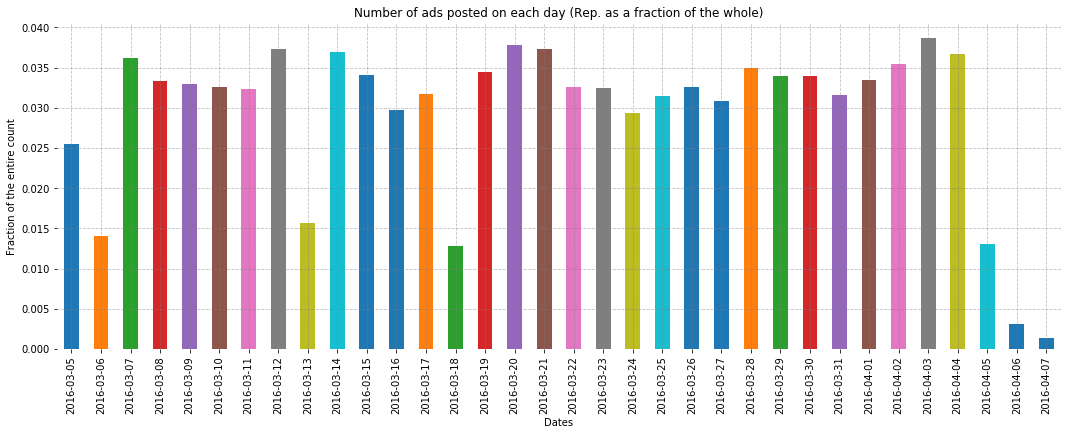

In [62]:
#Uncomment the line below to print the value counts
#autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

plt.figure(figsize=(18,6))
ax = autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True).plot.bar()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xlabel('Dates')
ax.set_ylabel('Fraction of the entire count')
ax.set_title("Number of ads posted on each day (Rep. as a fraction of the whole)")
ax.grid(linestyle='--', color='gray', alpha =0.5)
plt.show()

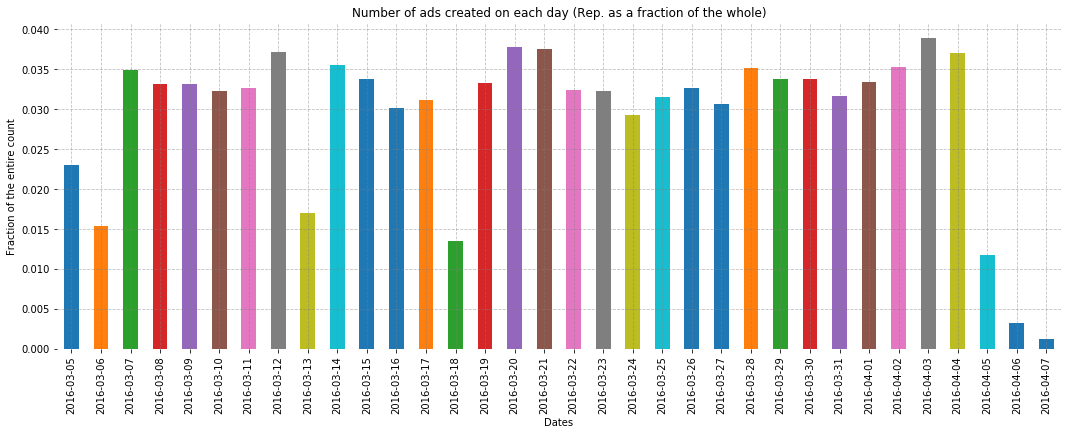

In [69]:
#Uncomment the line below to print the value counts
#autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

plt.figure(figsize=(18,6))
ax = autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True).tail(34).plot.bar()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xlabel('Dates')
ax.set_ylabel('Fraction of the entire count')
ax.set_title("Number of ads created on each day (Rep. as a fraction of the whole)")
ax.grid(linestyle='--', color='gray', alpha =0.5)
plt.show()

The plot above only shows the last 34 dates (that matches the dates on the plot for `date_posted`).

As expected, the plot for no. of ads created per day is quite correlated with no. of ads posted.

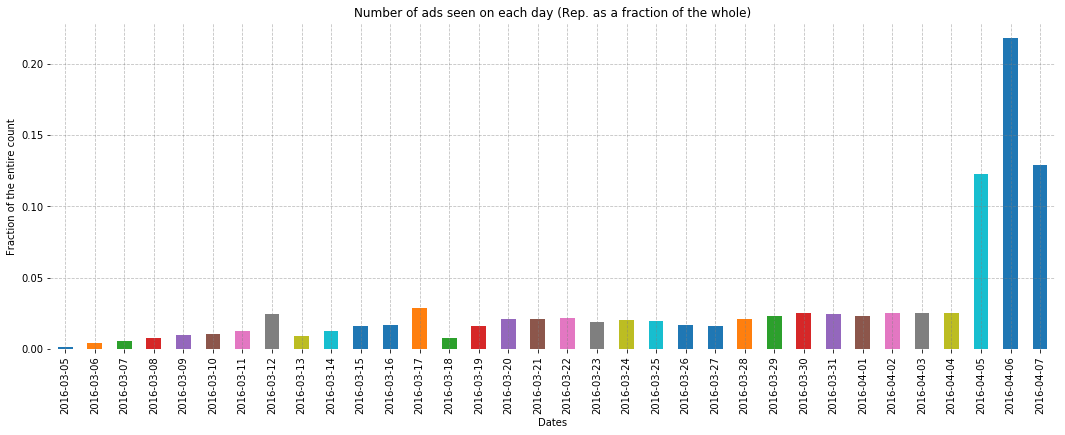

In [71]:
#Uncomment the line below to print the value counts
#autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

plt.figure(figsize=(18,6))
ax = autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True).plot.bar()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xlabel('Dates')
ax.set_ylabel('Fraction of the entire count')
ax.set_title("Number of ads seen on each day (Rep. as a fraction of the whole)")
ax.grid(linestyle='--', color='gray', alpha =0.5)
plt.show()

The plot for no. of ads seen per day looks different, compared to other two plots above. There is a sudden jump in no. of ads seen between dates 5th of April and 7th of April, whereas there is a steap dip in other two plots.

The following is range of dates in the given columns:
- __`date_crawled`__: 2016-03-05 -- 2016-04-07
- __`ad_created`__: 2015-08-10 -- 2016-04-07 (plotted only last 34 dates to match the other two plots)
- __`last_seen`__: 2016-03-05 -- 2016-04-07

### Cleaning the `registration_year` column

In [98]:
autos["registration_year"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    45207.000000
mean      2004.322848
std         82.234293
min       1000.000000
5%        1993.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
95%       2016.000000
max       9999.000000
Name: registration_year, dtype: float64

- In the column __`registration_year`__ we have a minimum value of 1000 and a maximum value of 9999, which is clearly incorrect.
- Considering the data between 5% and 95% percentile, most cars listed are registered between 1993 and 2016. Since the year of last ad is 2016, this should be the max value.

In [99]:
autos.loc[autos["registration_year"].between(1900, 2016), "registration_year"].describe()

count    43367.000000
mean      2002.657827
std          6.789829
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

A range of __`registration_year`__ of 1900-2016 was chosen since the first car invent was from late 1880s and it is highly unlikely that one would find a listing of a car from that era. So a lower bound of 1900 was chosen. An upper bound of 2016 was chosen because thats the year in which the last ad was created.

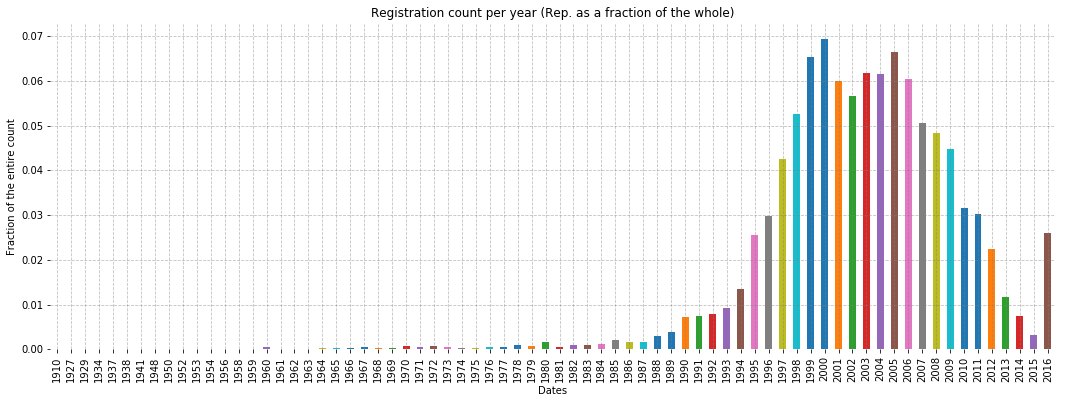

In [84]:
#Uncomment the line below to print the value counts
#autos["registration_year"].value_counts(normalize=True)

plt.figure(figsize=(18,6))
ax = autos.loc[autos["registration_year"].between(1900,2016), "registration_year"].value_counts(normalize=True).sort_index(ascending=True).plot.bar()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xlabel('Dates')
ax.set_ylabel('Fraction of the entire count')
ax.set_title("Registration count per year (Rep. as a fraction of the whole)")
ax.grid(linestyle='--', color='gray', alpha =0.5)
plt.show()

Based on the value counts, we can see that the listing has the highest percentage of cars from years surrounding the 2000s. Cars registered in the early and middle 1900s have the lowest percentage of them in the listings.

In [87]:
top20_brands = autos["brand"].value_counts(normalize=True).head(20).index

In [88]:
print(top20_brands)

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'volvo', 'mini', 'mitsubishi'],
      dtype='object')


In [104]:
mean_price_per_brand = {}

for brand in top20_brands:
    selected_rows = autos[autos["brand"] == brand]
    prices = np.array(selected_rows["price"].values)
    mean_price = np.mean(prices)
    mean_price_per_brand[brand] = mean_price

In [105]:
for brand in top20_brands:
    print(brand,": ", mean_price_per_brand[brand])

volkswagen :  4646.681911115894
opel :  2924.221067940993
bmw :  6352.311330896581
mercedes_benz :  6043.826850690088
audi :  6509.097131496734
ford :  3330.4438676184295
renault :  2442.1902967498822
peugeot :  3111.1869978086193
fiat :  2876.896160558464
seat :  4124.458895705521
skoda :  5861.924863387978
nissan :  4365.646198830409
mazda :  3722.534609720177
smart :  3596.40273556231
citroen :  3603.603125
toyota :  4860.592465753424
hyundai :  5223.1659388646285
volvo :  4540.20194647202
mini :  9551.55585106383
mitsubishi :  3087.3396739130435


Above is the dictionary of mean price of each top20 brand in descending order. The brands in __`top20_brands`__ are the 20 most occurring brands int he listing. The maximum mean price in this list is \$9,551 (Mini) at position 19, while the lowest is \$2,876 (Fiat) at position 9. Most of the popular listings are in the ballpark of \$3,000 to \$6,000.

In [106]:
mean_mileage_per_brand = {}

for brand in top20_brands:
    selected_rows = autos[autos["brand"] == brand]
    mileages = np.array(selected_rows["odometer_km"].values)
    mean_mileage = np.mean(mileages)
    mean_mileage_per_brand[brand] = mean_mileage

In [107]:
for brand in top20_brands:
    print(brand,": ", mean_mileage_per_brand[brand])

volkswagen :  131611.42795652643
opel :  129898.19239559527
bmw :  137575.79015265533
mercedes_benz :  136979.92471769135
audi :  137475.1491053678
ford :  125726.80077871511
renault :  128351.38954309939
peugeot :  127063.55003652301
fiat :  117181.50087260034
seat :  123355.8282208589
skoda :  113510.92896174864
nissan :  119758.77192982456
mazda :  126148.74815905743
smart :  99734.0425531915
citroen :  120484.375
toyota :  117260.27397260274
hyundai :  107685.58951965066
volvo :  139987.83454987835
mini :  93244.68085106384
mitsubishi :  128152.17391304347


In [108]:
mean_price_series = pd.Series(mean_price_per_brand)
mean_mileage_series = pd.Series(mean_mileage_per_brand)

In [109]:
price_and_mileage = pd.DataFrame(mean_price_series, columns=["mean_price"])

In [110]:
price_and_mileage["mean_mileage"] = mean_mileage_series

In [111]:
price_and_mileage

,mean_price,mean_mileage
audi,6509.097131,137475.149105
bmw,6352.311331,137575.790153
citroen,3603.603125,120484.375000
fiat,2876.896161,117181.500873
ford,3330.443868,125726.800779
hyundai,5223.165939,107685.589520
mazda,3722.534610,126148.748159
mercedes_benz,6043.826851,136979.924718
mini,9551.555851,93244.680851
mitsubishi,3087.339674,128152.173913


In [112]:
price_and_mileage.sort_values(by="mean_mileage", ascending=True)

,mean_price,mean_mileage
mini,9551.555851,93244.680851
smart,3596.402736,99734.042553
hyundai,5223.165939,107685.589520
skoda,5861.924863,113510.928962
fiat,2876.896161,117181.500873
toyota,4860.592466,117260.273973
nissan,4365.646199,119758.771930
citroen,3603.603125,120484.375000
seat,4124.458896,123355.828221
ford,3330.443868,125726.800779


Cars on the higher mileage end are on the expensive end of the mean price column. These cars are usually bigger in size and more reliable, as compared to low mileage cars (Mini and Smart) which are smaller in size. Low mileage cars are also cheaper with the exception of Mini.

In [113]:
autos.head(3)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


In [114]:
autos["seller"].unique()

array(['privat'], dtype=object)

In [115]:
autos["offer_type"].unique()

array(['Angebot'], dtype=object)

In [116]:
autos["vehicle_type"].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [117]:
autos["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [118]:
autos["fuel_type"].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [119]:
autos["unrepaired_damage"].unique()

array(['nein', nan, 'ja'], dtype=object)

In [120]:
autos["model"].unique()

array(['andere', '7er', 'golf', 'fortwo', 'focus', 'voyager', 'arosa',
       'megane', nan, 'a3', 'clio', 'vectra', 'scirocco', '3er', 'a4',
       'polo', 'cooper', 'e_klasse', 'c_klasse', 'corsa', '5er', 'mondeo',
       'altea', 'a1', 'twingo', 'a_klasse', '3_reihe', 's_klasse',
       'sandero', 'passat', 'primera', 'wrangler', 'a6', 'transporter',
       'astra', 'v40', 'ibiza', 'micra', '1er', 'yaris', 'colt',
       '6_reihe', '5_reihe', 'corolla', 'ka', 'punto', 'vito', 'cordoba',
       'galaxy', '100', '2_reihe', 'octavia', 'm_klasse', 'lupo',
       'fiesta', 'superb', 'meriva', 'c_max', 'laguna', '1_reihe',
       'touareg', 'seicento', 'touran', 'avensis', 'vivaro', 'ducato',
       'tigra', 'carnival', 'signum', 'sharan', 'zafira', 'rav', 'a5',
       'beetle', 'c_reihe', 'phaeton', 'sl', 'up', 'civic', '80',
       'mx_reihe', 'omega', 'x_reihe', 'sorento', 'z_reihe', 'berlingo',
       'clk', 's_max', 'kalos', 'cx_reihe', 'grand', 'swift', 'tiguan',
       'sprinter', 

Above are the columns that contain german words, which will be replaced with their english translation.

In [121]:
translation_mapping = {
    "privat":"private",
    "Angebot":"offer",
    "kleinwagen":"small_car",
    "kombi":"station_wagon",
    "andere":"other",
    "manuell":"manual",
    "automatik":"automatic",
    "benzin":"petrol",
    "elektro":"electric",
    "nein":"no",
    "ja":"yes",
    "klasse":"class"
}

In [122]:
#English translated DataFrame
autos = autos.replace(translation_mapping)

In [123]:
date_cols = ["date_crawled", "ad_created", "last_seen"]
for c in date_cols:
    autos[c] = (autos[c].str[:10]
                        .str.replace("-","")
                        .astype(int))

In [127]:
autos.head(10)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000.0,control,bus,2004,manual,158,other,150000.0,3,lpg,peugeot,no,20160326,0,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,20160404,0,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,private,offer,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,20160326,0,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350.0,control,small_car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,20160312,0,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350.0,test,station_wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,20160401,0,39218,20160401
5,20160321,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,private,offer,7900.0,test,bus,2006,automatic,150,voyager,150000.0,4,diesel,chrysler,NaN,20160321,0,22962,20160406
6,20160320,VW_Golf_III_GT_Special_Electronic_Green_Metall...,private,offer,300.0,test,limousine,1995,manual,90,golf,150000.0,8,petrol,volkswagen,NaN,20160320,0,31535,20160323
7,20160316,Golf_IV_1.9_TDI_90PS,private,offer,1990.0,control,limousine,1998,manual,90,golf,150000.0,12,diesel,volkswagen,no,20160316,0,53474,20160407
8,20160322,Seat_Arosa,private,offer,250.0,test,NaN,2000,manual,0,arosa,150000.0,10,NaN,seat,no,20160322,0,7426,20160326
9,20160316,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,private,offer,590.0,control,bus,1997,manual,90,megane,150000.0,7,petrol,renault,no,20160316,0,15749,20160406


In [128]:
brands = autos["brand"].unique()

In [129]:
brands

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'mini', 'toyota', 'dacia', 'nissan', 'jeep',
       'saab', 'volvo', 'mitsubishi', 'fiat', 'skoda', 'subaru', 'kia',
       'citroen', 'porsche', 'hyundai', 'chevrolet', 'honda', 'daewoo',
       'suzuki', 'trabant', 'land_rover', 'jaguar', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [144]:
brand_model_count = {}
for brand in brands:
    selected_rows = autos[autos["brand"] == brand]
    models = selected_rows["model"]
    for model in models:
        brand_model = str(brand)+"_"+str(model)
        if brand_model in brand_model_count:
            brand_model_count[brand_model] += 1
        else:
            brand_model_count[brand_model] = 1

In [150]:
brand_model_count_sorted = sorted(brand_model_count.items(), reverse=True, key=lambda kv: kv[1])

In [154]:
brand_model_count_sorted[:10]

[('volkswagen_golf', 3505),
 ('bmw_3er', 2483),
 ('volkswagen_polo', 1531),
 ('opel_corsa', 1503),
 ('volkswagen_passat', 1320),
 ('opel_astra', 1314),
 ('audi_a4', 1169),
 ('mercedes_benz_c_klasse', 1060),
 ('bmw_5er', 1038),
 ('mercedes_benz_e_klasse', 844)]

Above are the 10 most common brand-model combinations listed on the website. As one can notice, the top model-brand combinations are mostly inexpensive daily driver cars.

In [159]:
#There are 13 groups of odometer readings.
autos["odometer_km"].unique().shape

(13,)

In [161]:
odometer_readings = autos["odometer_km"].unique()
mileage_price = {}

for group in odometer_readings:
    selected_rows = autos[autos["odometer_km"] == group]
    prices = selected_rows["price"]
    mileage_price[group] = prices.mean()
    

In [162]:
mileage_price

{5000.0: 3957.6064735945483,
 10000.0: 10134.0,
 20000.0: 9101.341101694916,
 30000.0: 9646.246728971963,
 40000.0: 9819.66779089376,
 50000.0: 9058.271317829458,
 60000.0: 8338.630151843818,
 70000.0: 8174.687561214496,
 80000.0: 7610.503655564582,
 90000.0: 6635.005252790545,
 100000.0: 6271.12017167382,
 125000.0: 5300.555048859935,
 150000.0: 3542.648160236369}

__Correlation between mileage and average price:__ With the exception of 5,000 km group, we have a trend of decreasing prices with increasing mileage.

In [167]:
damaged_vs_undamaged_price = {}

for status in ["yes", "no"]:
    selected_rows = autos[autos["unrepaired_damage"] == status]
    avg_price = selected_rows["price"].mean()
    damaged_vs_undamaged_price[status] = avg_price

In [168]:
damaged_vs_undamaged_price

{'no': 5383.153476378454, 'yes': 2137.885157350869}

In [ ]:
print("Ratio o")